# Tarea N°3

- Gabriel Álvarez Martínez-Conde
- Valeska Farías Caicedo
- Constanza Perez Pulido
- Rosario Valderrama Labarca

## 1. Objetivo

En este laboratorio deberá *aplicar* los algoritmos aprendidos en la clase e investigar del uso de la libreria python scikit-learn y sus funciones más útiles para estos métodos. Su meta es realizar un análisis de datos completo probando los distintos métodos supervisados vistos hasta ahora (Naive Bayes, Análisis de Discriminante, Regresión Logística).

Para esto utilizará la base load_breast_cancer anteriormente utilizada. Además los siguientes comandos de la librería sklearn, para la siguiente base:

```
# X, y =fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X.drop(['boat', 'body', 'home.dest'], axis=1, inplace=Tru```
```

Por último, nos gustaría saber el destino de los dos pasajeros de los cuales se presentan sus boletos en el Titanic. También, nos interesa entender si la edad es un elemento determinante para la sobrevida.

## 2. Introducción

## 3. Importación de paquetes

In [8]:
# !pip install pandas
# !pip install seaborn
# !pip install numpy
# !pip install matplotlib
# !pip install scikit-learn

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Obtención del Dataset

### - load_brest_cancer

In [10]:
cancer= pd.DataFrame(load_breast_cancer().data,columns = load_breast_cancer().feature_names)

El data frame contiene 569 filas con datos de pacientes con tumores, los cuales, pueden ser malignos o benignos, esto se determina según las caracteristicas del tumor que están descritas en distintas variables, como "promedio del radio", "promedio de la textura", "promedio del perimetro", entre otras.

Las variables son las siguientes:

In [11]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [12]:
# Verificar si hay valores nulos en el DataFrame
null_counts = cancer.isnull().sum()

# Mostrar las columnas que tienen valores nulos
print("Conteo de valores nulos por columna:")
print(null_counts[null_counts > 0])

Conteo de valores nulos por columna:
Series([], dtype: int64)


In [1]:
#print(null_counts) #no hay nulos

In [4]:
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
cancer_data = load_breast_cancer()
# Convertir a DataFrame (incluir tanto los datos como las etiquetas)
df_cancer = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)

# Añadir la columna de la etiqueta (maligno o benigno) al DataFrame
df_cancer['target'] = cancer_data.target

# Ver las primeras filas del DataFrame
print(df_cancer.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [7]:
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset de breast cancer
cancer_data = load_breast_cancer()

# Convertir a DataFrame (incluir tanto los datos como las etiquetas)
df_cancer = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)

# Añadir la columna de la etiqueta (maligno o benigno) al DataFrame
df_cancer['target'] = cancer_data.target

# Dividir las características (X) y la etiqueta (y)
X = df_cancer.drop('target', axis=1)
y = df_cancer['target']



# MÉTODOS SUPERVISADOS

## REGRESIÓN LOGÍSTICA

Para este método se utlizará el data frame Titanic.

In [12]:
from sklearn.datasets import fetch_openml
from sklearn.impute import KNNImputer

In [13]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X.drop(['boat', 'body', 'home.dest'], axis=1, inplace=True)

OpenMLError: Dataset with data_id 40945 not found.

In [ ]:
print(X.columns)

In [ ]:
print(y.isnull().sum())

In [ ]:
print(X.isnull().sum())

Características del dataset:
- survived: Indica si el pasajero sobrevivió (1) o no (0).
- pclass: Clase del boleto del pasajero (1ra, 2da, 3ra clase).
- sex: Género del pasajero.
- age: Edad del pasajero.
- sibsp: Número de hermanos/cónyuges a bordo.
- parch: Número de padres/hijos a bordo.
- fare: Tarifa pagada por el boleto.
- embarked: Puerto de embarque (C = Cherburgo, Q = Queenstown, S = Southampton).

Al revisar la cantidad de datos nulos que contiene el data frame titanic, observamos que la variable age (edad) tiene 263 observaciones nulas y cabin (cabinaPara solucionar esto utilizaremos imputación de datos con la moda, pero esta condiconada a otras variable para lograr mayor acertividad al momento de imputar. categóricas. 

In [ ]:
# reemplazamos con la moda según pclass y sex
X['cabin'] = X['cabin'].astype('category')

# Función para imputar la moda condicionalmente
def impute_mode(row):
    if pd.isnull(row['cabin']):
        mode_value = X[(X['pclass'] == row['pclass']) & (X['sex'] == row['sex'])]['cabin'].mode()
        return mode_value[0] if not mode_value.empty else row['cabin']  # Retorna la moda si existe
    else:
        return row['cabin']

# Aplicar la función
X['cabin'] = X.apply(impute_mode, axis=1)

# Comprobar resultados
print(X['cabin'].isnull().sum())

In [ ]:
# reemplazamos con la moda considerando pclass, sex y cabin
X['age'] = X['age'].astype('category')

# Función para imputar la moda condicionalmente
def impute_mode(row):
    if pd.isnull(row['age']):
        mode_value = X[(X['pclass'] == row['pclass']) & (X['sex'] == row['sex']) & (X['cabin'] == row['cabin'])]['age'].mode()
        return mode_value[0] if not mode_value.empty else row['age']  # Retorna la moda si existe
    else:
        return row['age']

# Aplicar la función
X['age'] = X.apply(impute_mode, axis=1)

# Comprobar resultados
print(X['age'].isnull().sum())

quedan 16 observaciones con datos nulos, esto puede ser debido a que no existe una moda para el cruce de variables propuesto. Asi que eliminaremos esas filas.

In [ ]:
X.dropna(subset=['cabin'], inplace=True)

Los datos están preparados para aplicar Regresión Logística y Naive Bayes

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [16]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Entrenar un modelo de regresión logística
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)


X: Contiene las características (todas las columnas excepto 'target').

y: Contiene la etiqueta (columna 'target').

Luego, se dividen los datos en conjuntos de entrenamiento y prueba, y se entrena un modelo de Regresión Logística.

In [17]:
# Calcular la precisión (accuracy) y el recall
accuracy_cancer = accuracy_score(y_test, y_pred)
recall_cancer = recall_score(y_test, y_pred)

print(f"Exactitud del modelo (RL): {accuracy_cancer:.4f}")
print(f"Recall del modelo (RL): {recall_cancer:.4f}")

Exactitud del modelo (RL): 0.9693
Recall del modelo (RL): 0.9730


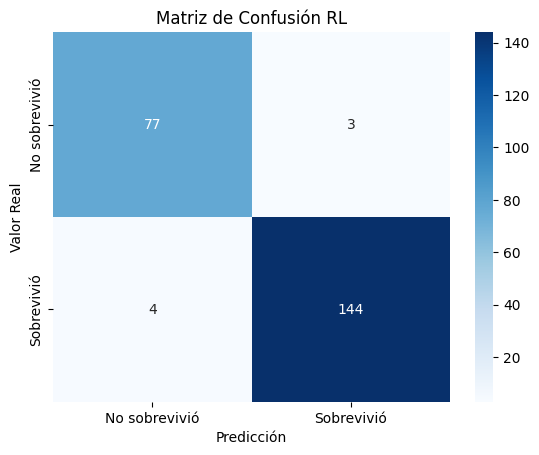

In [17]:
# Calcular la matriz de confusión
conf_matrix_cancer = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
sns.heatmap(conf_matrix_cancer, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión RL')
plt.show()

# Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
# Entrenar un modelo de Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular la precisión (accuracy) y el recall
accuracy_cancer_nb = accuracy_score(y_test, y_pred)
recall_cancer_nb = recall_score(y_test, y_pred)

print(f"Exactitud del modelo (Naive Bayes): {accuracy_cancer_nb:.4f}")
print(f"Recall del modelo (Naive Bayes): {recall_cancer_nb:.4f}")


Exactitud del modelo (Naive Bayes): 0.9518
Recall del modelo (Naive Bayes): 0.9730


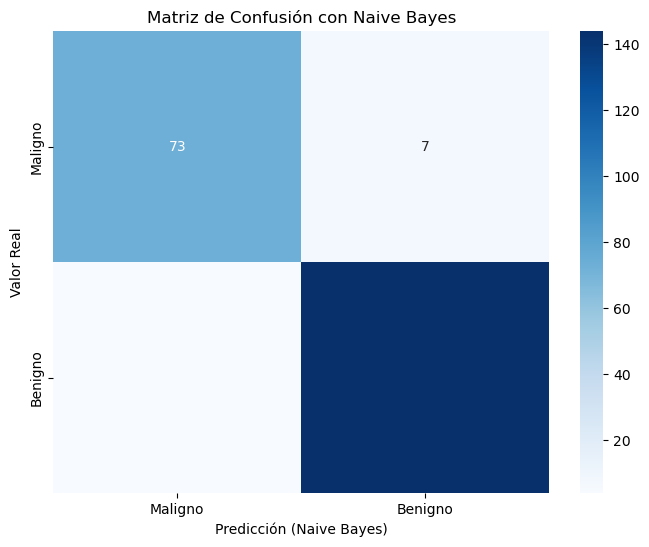

In [20]:
# Calcular la matriz de confusión
conf_matrix_cancer_nb = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_cancer_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Maligno', 'Benigno'], yticklabels=['Maligno', 'Benigno'])
plt.ylabel('Valor Real')
plt.xlabel('Predicción (Naive Bayes)')
plt.title('Matriz de Confusión con Naive Bayes')
plt.show()

# Análisis de Discriminante

In [21]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular la precisión (accuracy) y el recall
accuracy_cancer_lda = accuracy_score(y_test, y_pred)
recall_cancer_lda = recall_score(y_test, y_pred)

print(f"Exactitud del modelo (LDA): {accuracy_cancer_lda:.4f}")
print(f"Recall del modelo (LDA): {recall_cancer_lda:.4f}")



Exactitud del modelo (LDA): 0.9605
Recall del modelo (LDA): 0.9865


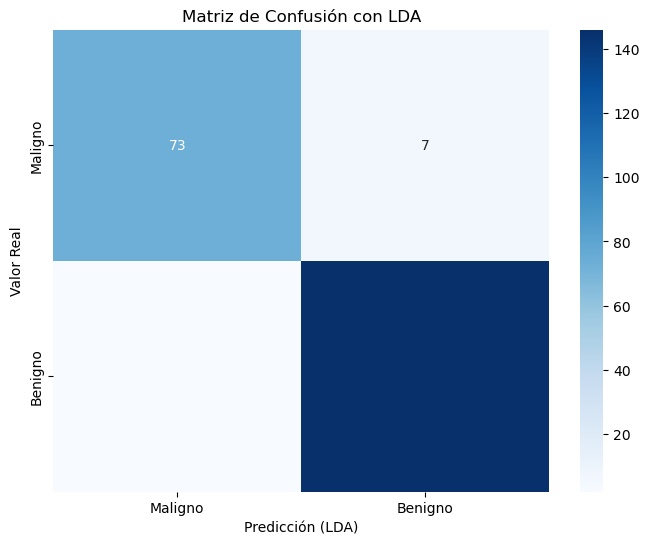

In [22]:
# Calcular la matriz de confusión
conf_matrix_cancer_lda = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_cancer_lda, annot=True, fmt='d', cmap='Blues', xticklabels=['Maligno', 'Benigno'], yticklabels=['Maligno', 'Benigno'])
plt.ylabel('Valor Real')
plt.xlabel('Predicción (LDA)')
plt.title('Matriz de Confusión con LDA')
plt.show()

## PCA Análisis de Componentes Principales

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt


In [25]:
# Cargar el dataset de breast cancer
#cancer_data = load_breast_cancer()
#df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)

# Escalar las características
scaler3 = StandardScaler()
X3_scaled3 = scaler3.fit_transform(df_cancer)

# Aplicar PCA
pca = PCA(n_components=2)  # Reducir a 2 dimensiones para visualización
X3_pca = pca.fit_transform(X3_scaled3)

# Crear un DataFrame para las componentes principales
df_pca = pd.DataFrame(data=X3_pca, columns=['Componente Principal 1', 'Componente Principal 2'])
df_pca['target'] = df_cancer['target']



In [27]:

# Explicar la varianza de cada componente
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por la Componente Principal 1: {explained_variance[0]:.4f}")
print(f"Varianza explicada por la Componente Principal 2: {explained_variance[1]:.4f}")

Varianza explicada por la Componente Principal 1: 0.4490
Varianza explicada por la Componente Principal 2: 0.1847


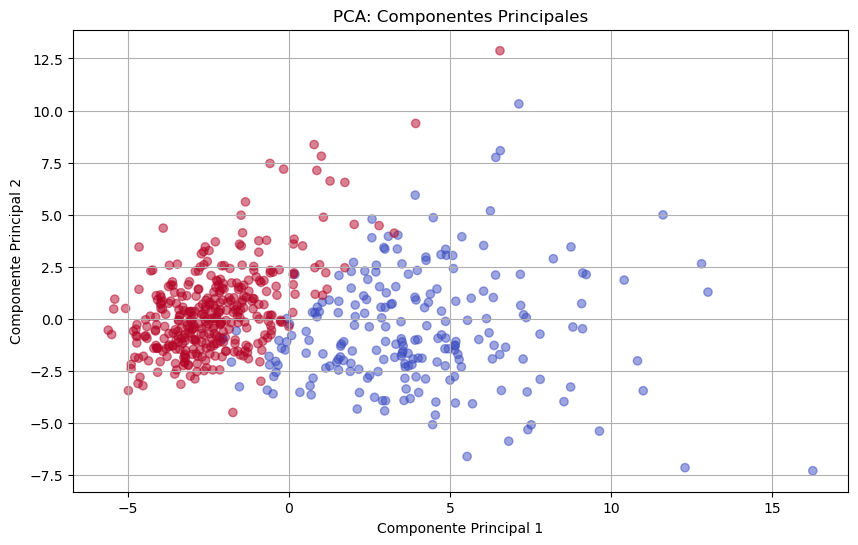

In [26]:
# Graficar las dos primeras componentes principales
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca['Componente Principal 1'], df_pca['Componente Principal 2'],
                      c=df_pca['target'], cmap='coolwarm', alpha=0.5)
plt.title('PCA: Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.show()


## KMeans

In [28]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# Cargar el dataset de breast cancer
#cancer_data = load_breast_cancer()
#df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
#df['target'] = cancer_data.target

# Dividir las características (X) y la etiqueta (y)
X2 = df_cancer.drop('target', axis=1)
y2 = df_cancer['target']

# Escalar las características (importante para K-means)
scaler2 = StandardScaler()
X2_scaled2 = scaler2.fit_transform(X)

# Aplicar K-means
kmeans = KMeans(n_clusters=2, random_state=42) #2 cluster (benigno o no maligno)
y2_kmeans = kmeans.fit_predict(X2_scaled2)




C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [31]:
# Calcular la precisión (accuracy) y el recall
accuracy_km = accuracy_score(y2, y2_kmeans)
recall_km = recall_score(y2, y2_kmeans)

print(f"Exactitud del modelo (K-means): {accuracy_km:.4f}")
print(f"Recall del modelo (K-means): {recall_km:.4f}")

Exactitud del modelo (K-means): 0.9104
Recall del modelo (K-means): 0.9608


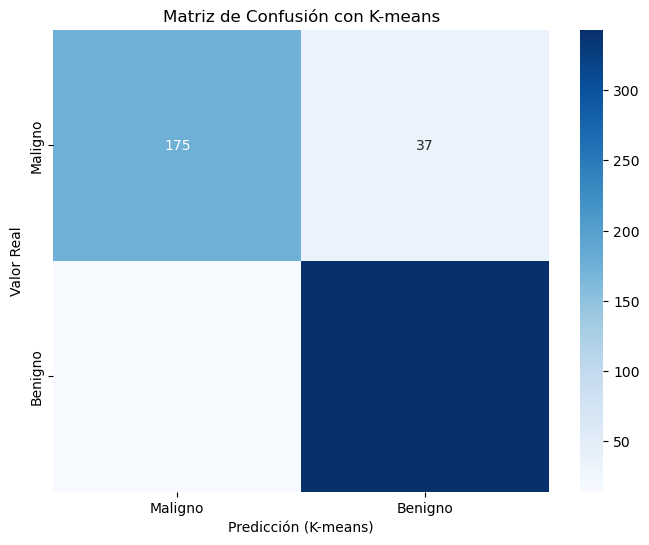

In [32]:
# Calcular la matriz de confusión
conf_matrix_cancer_km = confusion_matrix(y2, y2_kmeans)

# Graficar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_cancer_km, annot=True, fmt='d', cmap='Blues', xticklabels=['Maligno', 'Benigno'], yticklabels=['Maligno', 'Benigno'])
plt.ylabel('Valor Real')
plt.xlabel('Predicción (K-means)')
plt.title('Matriz de Confusión con K-means')
plt.show()
